In [124]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
import xlrd
import matplotlib.ticker as mticker

In [2]:
def center(x):
    x = np.array(x)
    mean = x.mean(axis=1, keepdims=True)
    return x-mean

In [3]:
def whitening(x):
    cov = np.cov(x)
    d = np.linalg.eigh(cov)[0]
    U = np.linalg.eigh(cov)[1]
    D = np.diag(d)
    D_inv = np.sqrt(np.linalg.inv(D))
    x = np.dot(U, np.dot(D_inv, np.dot(U.T, x)))
    return x

In [4]:
def g(x):
    return np.tanh(x)

In [5]:
def der_g(x):
    return 1 - g(x)*g(x)

In [6]:
def new_w(w, X):
    w= (X*g(np.dot(w.T,X))).mean(axis=1)-der_g(np.dot(w.T,X)).mean()*w
    w=w/np.sqrt(sum(w*w))
    return w

In [7]:
def ica(X,p,iterations, tolerance=0.00001):
    X = center(X)
    X = whitening(X)  
    n = len(X)
    W = np.zeros((p,n))
    for i in range(p):
        w = np.random.rand(n)
        for j in range(iterations):
            w1=new_w(w,X)
            if i>=1:
                w1 = w1-np.dot(np.dot(w1,W[:i].T), W[:i])
            dist=np.abs(np.abs(sum(w*w1))-1)
            w=w1
            if dist<tolerance:
                break    
        W[i,:]=w
        print(W)
    S = np.dot(W, X)
    return S,W

In [8]:
def plot_graph(X, original, S):
    fig = plt.figure(figsize = (16,12))

    plt.subplot(3, 1, 1)
    for x in X:
        plt.plot(x)
    plt.title("signals recieved through mics")

    plt.subplot(3, 1, 2)
    for s in original:
        plt.plot(s)
    plt.title("signals generated through speakers")

    plt.subplot(3,1,3)
    for s in S:
        plt.plot(s)
    plt.title("signals predicted by ICA")
    
    plt.show()

In [9]:
t = np.linspace(0,4,100)
s1 = (np.sin(t))*(np.sin(t))+np.cos(t)
s2 = np.sin(3*t + np.pi/2)
s3 = signal.sawtooth(2 * np.pi * t)

[[-0.47207027  0.17645945  0.8637197 ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[-0.47207027  0.17645945  0.8637197 ]
 [ 0.81199792 -0.28476304  0.50197906]
 [ 0.          0.          0.        ]]
[[-0.47207027  0.17645945  0.8637197 ]
 [ 0.81199792 -0.28476304  0.50197906]
 [ 0.33508942  0.94027776 -0.00895561]]


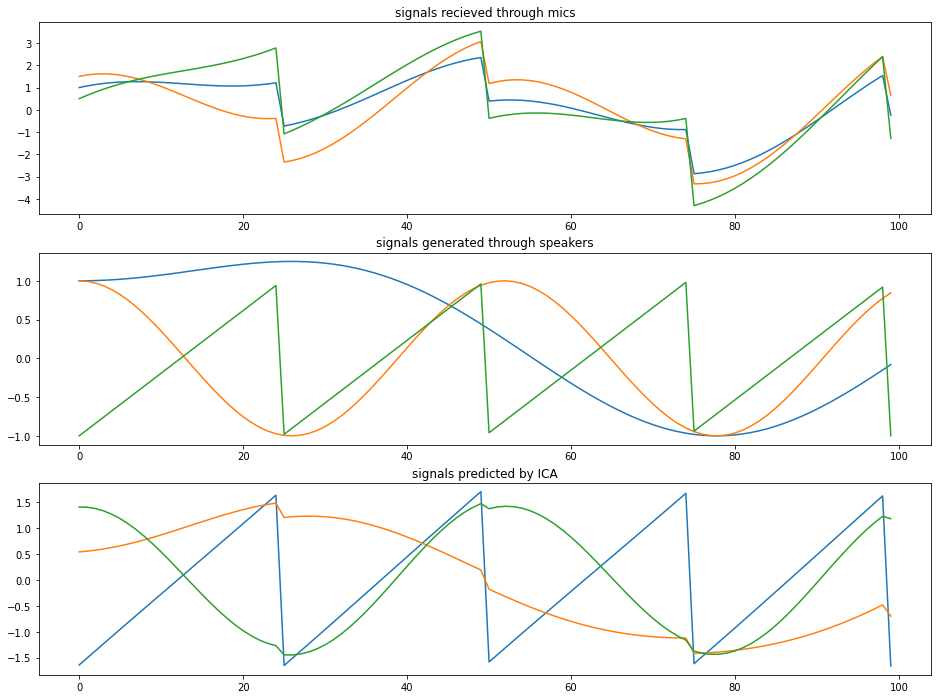

In [63]:
X = np.zeros((100,3))
X[:,0] = s1
X[:,1] = s2
X[:,2] = s3

A = np.array(([[1,1,1],[0.5,2,1],[1.5,1,2]]))
X = X.T
X = np.dot(A, X)
S,W = ica(X,3, iterations=1000)
plot_graph(X,[s1, s2, s3],S)

In [34]:
X.shape

(3, 100)

In [36]:
X = np.zeros((100,2))
X[:,0] = s1
X[:,1] = s2
X = X.T
A= np.array(([[3,0.33],[0.5,2]]))
X = np.dot(A,X)
X

array([[ 3.33      ,  3.33002512,  3.33010807,  3.33027128,  3.33055105,
         3.33099604,  3.33166507,  3.33262445,  3.33394482,  3.3356975 ,
         3.33795062,  3.34076483,  3.34418896,  3.34825549,  3.35297608,
         3.35833719,  3.36429591,  3.37077606,  3.37766472,  3.38480921,
         3.39201462,  3.39904205,  3.40560747,  3.41138133,  3.41598911,
         3.41901249,  3.41999158,  3.41842786,  3.41378803,  3.40550869,
         3.3930018 ,  3.37566083,  3.3528677 ,  3.32400018,  3.28843991,
         3.24558078,  3.19483763,  3.13565514,  3.06751683,  2.98995393,
         2.90255414,  2.80497007,  2.69692725,  2.57823155,  2.44877595,
         2.30854657,  2.15762769,  1.9962059 ,  1.82457314,  1.64312857,
         1.4523793 ,  1.25293983,  1.04553029,  0.83097334,  0.61018987,
         0.38419339,  0.15408333, -0.07896295, -0.31369907, -0.54881965,
        -0.78297111, -1.01476328, -1.24278169, -1.46560029, -1.68179456,
        -1.8899549 , -2.08869995, -2.27668994, -2.4

In [42]:
X = center(X)
cov = np.cov(X)
d =  np.linalg.eigh(cov)[0]
U = np.linalg.eigh(cov)[1]
D = np.diag(d)

In [45]:
D_inv = np.sqrt(np.linalg.inv(D))
X = np.dot(U, np.dot(D_inv, np.dot(U.T, X)))
X

array([[ 0.73249235,  0.73446876,  0.74037207,  0.75012489,  0.7635992 ,
         0.78061786,  0.80095664,  0.82434678,  0.85047809,  0.87900251,
         0.90953808,  0.94167328,  0.97497171,  1.00897701,  1.04321801,
         1.077214  ,  1.11048005,  1.1425324 ,  1.17289374,  1.20109842,
         1.22669739,  1.24926305,  1.26839366,  1.28371751,  1.29489664,
         1.30163017,  1.30365714,  1.30075889,  1.29276092,  1.27953416,
         1.26099586,  1.23710978,  1.20788596,  1.17337992,  1.13369146,
         1.08896285,  1.03937671,  0.98515346,  0.92654837,  0.86384837,
         0.79736855,  0.72744845,  0.65444824,  0.57874477,  0.50072752,
         0.42079468,  0.33934916,  0.25679476,  0.17353254,  0.08995732,
         0.00645444, -0.07660319, -0.15885775, -0.2399688 , -0.31961531,
        -0.39749724, -0.47333677, -0.5468792 , -0.61789341, -0.68617203,
        -0.75153126, -0.81381027, -0.87287048, -0.92859437, -0.98088425,
        -1.02966068, -1.07486082, -1.1164366 , -1.1

In [95]:
data = pd.read_csv('INR=X.csv')
data = data[73:193]
data

,Date,Exchange,Sensex,dates
73,01-01-2010,46.400002,17473.45,01-01-2010
74,01-02-2010,46.098000,16339.32,NaN
75,01-03-2010,45.967999,16438.45,NaN
76,01-04-2010,44.733002,17555.04,NaN
77,01-05-2010,44.217999,17536.86,01-05-2010
...,...,...,...,...
188,01-08-2019,68.999901,37387.18,NaN
189,01-09-2019,71.680298,37181.76,NaN
190,01-10-2019,70.638000,38813.48,NaN
191,01-11-2019,71.272499,40196.07,NaN


In [96]:
s1 = data['Exchange']
s2 = data['Sensex']
X = np.zeros((120,2))
X[:,0] = s1
X[:,1] = s2
X = X.T
X.shape

(2, 120)

[[0.26631153 0.96388701]
 [0.         0.        ]]
[[ 0.26631153  0.96388701]
 [ 0.92537738 -0.25567174]]


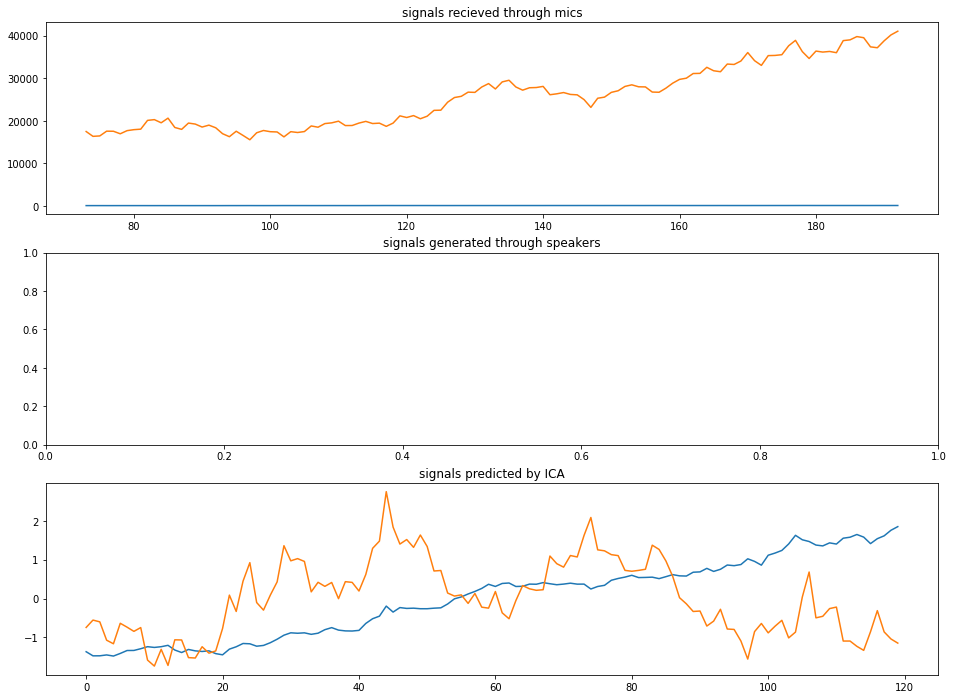

In [97]:
S,W = ica(X,2, iterations=5000)
plot_graph([s1,s2],[],S)

Text(0.5, 0, 'Time')

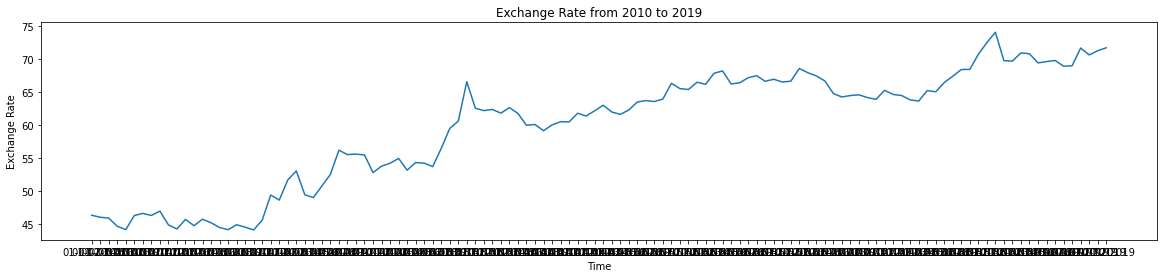

In [119]:
plt.figure(figsize = (20,4))
plt.plot(data['Date'],s1)
plt.title('Exchange Rate from 2010 to 2019')
plt.ylabel('Exchange Rate')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

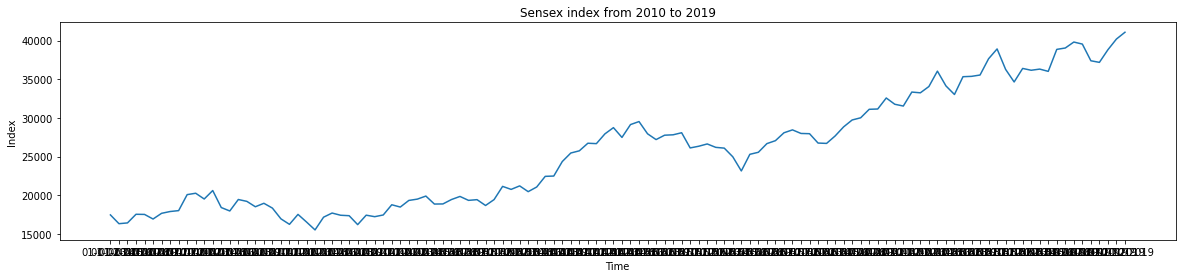

In [120]:
plt.figure(figsize = (20,4))
plt.plot(data['Date'],s2)
plt.title('Sensex index from 2010 to 2019')
plt.ylabel('Index')
plt.xlabel('Time')

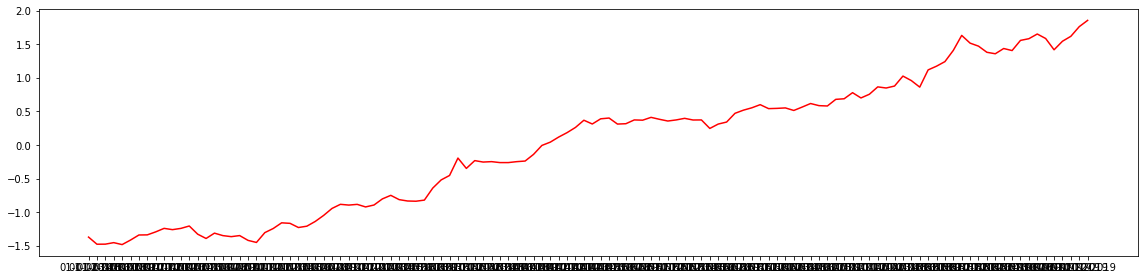

In [121]:
plt.figure(figsize = (16,4))
plt.plot(data['Date'],S[0],'r')

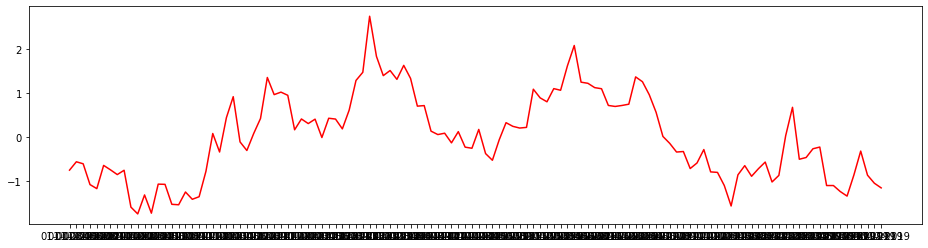

In [123]:
plt.figure(figsize = (16,4))
plt.plot(data['Date'],S[1],'r')

In [129]:
independent = pd.DataFrame({
    'Date' : data['Date'],
    '1st' : S[0],
    '2nd' : S[1]
}) 
independent.to_csv('independent.csv',index = False)

In [24]:
sampling_rate, mix1 = wavfile.read('mix1.wav')
sampling_rate, mix2 = wavfile.read('mix2.wav')

[[-0.72779842 -0.68579112]
 [ 0.          0.        ]]
[[-0.72779842 -0.68579112]
 [-0.68579088  0.72779817]]


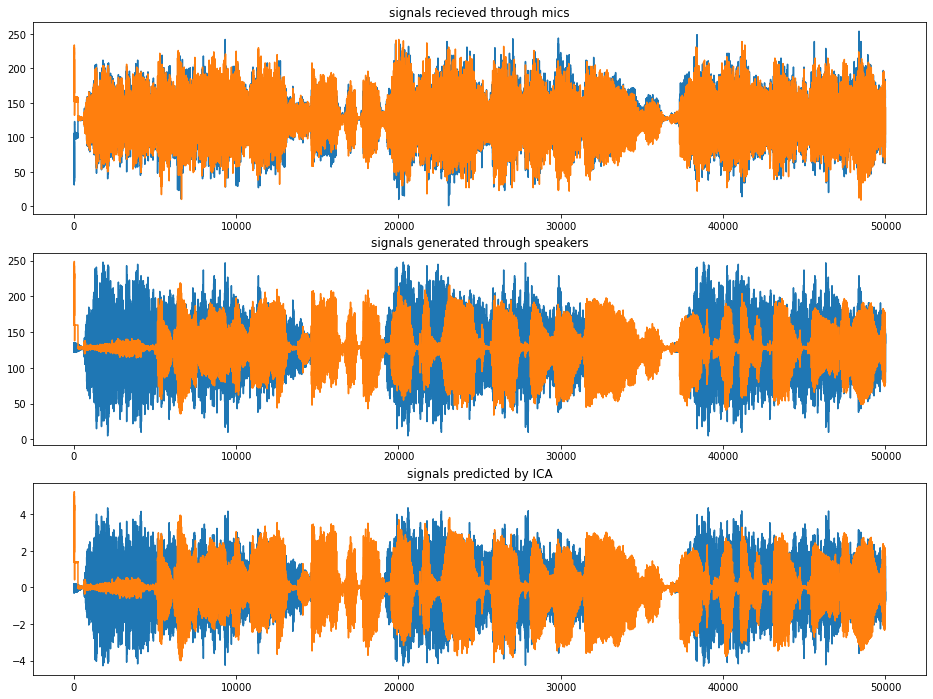

In [25]:
sampling_rate, source1 = wavfile.read('source1.wav')
sampling_rate, source2 = wavfile.read('source2.wav')
X = np.zeros((50000,2))
X[:,0] = mix1
X[:,1] = mix2
X = X.T
S,W = ica(X,2, iterations=1000)

plot_graph(X, [source1, source2], S)

wavfile.write('out1.wav', sampling_rate, S[0])
wavfile.write('out2.wav', sampling_rate, S[1])

In [10]:
sampling_rate, source1 = wavfile.read("recodings\mixture1.wav")
sampling_rate, source2 = wavfile.read("recodings\mixture2.wav")
X = np.zeros((288000,2))
X[:,0] = source1[:,0]
X[:,1] = source2[:,0]
X = X.T

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_3480/134018960.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, source1 = wavfile.read("recodings\mixture1.wav")
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_3480/134018960.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, source2 = wavfile.read("recodings\mixture2.wav")


[[0.13364147 0.99102975]
 [0.         0.        ]]
[[ 0.13364147  0.99102975]
 [ 0.99090138 -0.13362416]]


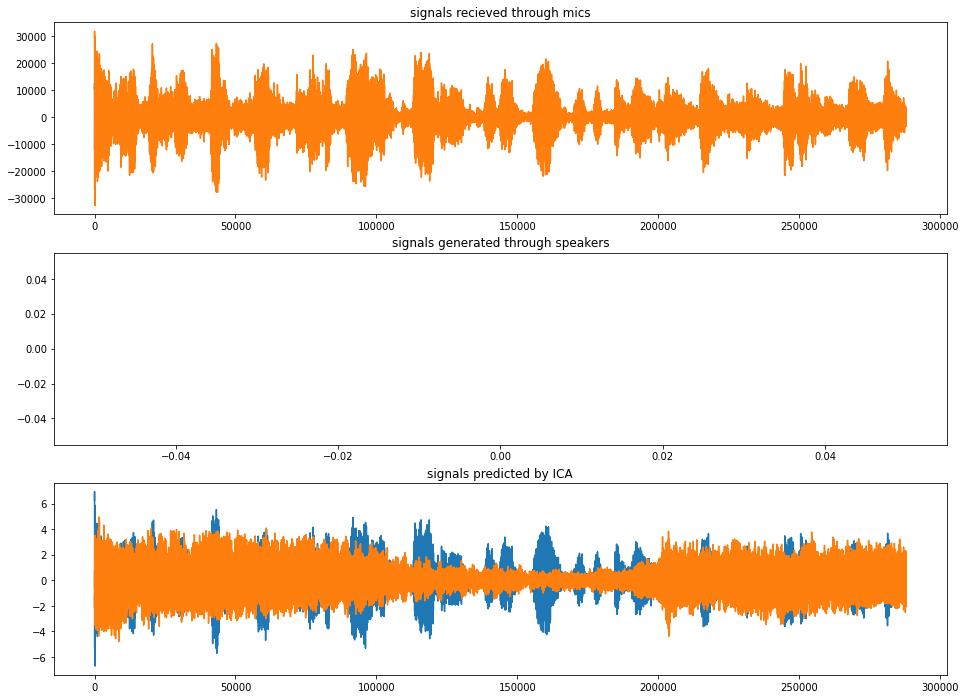

In [11]:
S,W = ica(X,2, iterations=1000)

plot_graph(X, [[],[]], S)

wavfile.write('output1.wav', sampling_rate, S[0])
wavfile.write('output2.wav', sampling_rate, S[1])

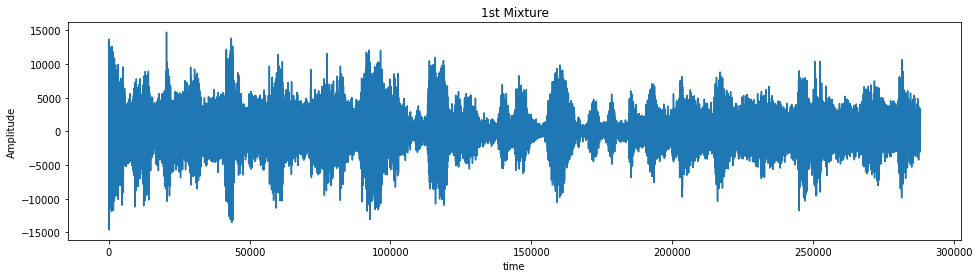

In [31]:
plt.figure(figsize = (16,4))
plt.plot(X[0])
plt.title('1st Mixture')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.savefig('Mixture1.png')

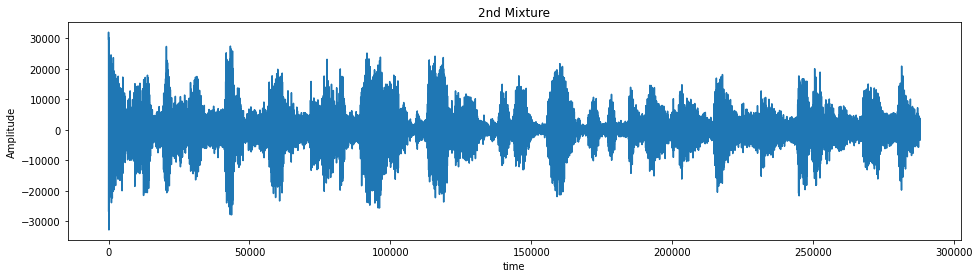

In [32]:
plt.figure(figsize = (16,4))
plt.plot(X[1])
plt.title('2nd Mixture')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.savefig('Mixture2.png')

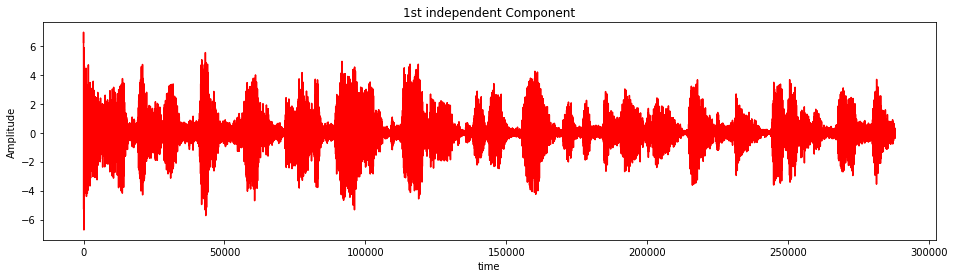

In [33]:
plt.figure(figsize = (16,4))
plt.plot(S[0],'r')
plt.title('1st independent Component')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.savefig('1st independent Component.png')

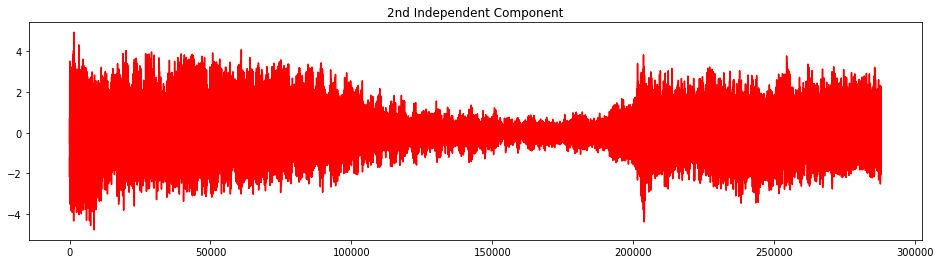

In [34]:
plt.figure(figsize = (16,4))
plt.plot(S[1],'r')
plt.title("2nd Independent Component")
plt.savefig('2nd Independent Component.png')

In [36]:
aqi = pd.read_excel('AQI.xlsx')
aqi = aqi[['Date.1','AQIDelhi','AQIGurugram']][30:60]
aqi
s1 = aqi['AQIDelhi']
s2 = aqi['AQIGurugram']
X = np.zeros((30,2))
X[:,0] = s1
X[:,1] = s2
X = X.T
X.shape

(2, 30)

[[0.87214049 0.48925552]
 [0.         0.        ]]
[[ 0.87214049  0.48925552]
 [ 0.45313129 -0.80774592]]


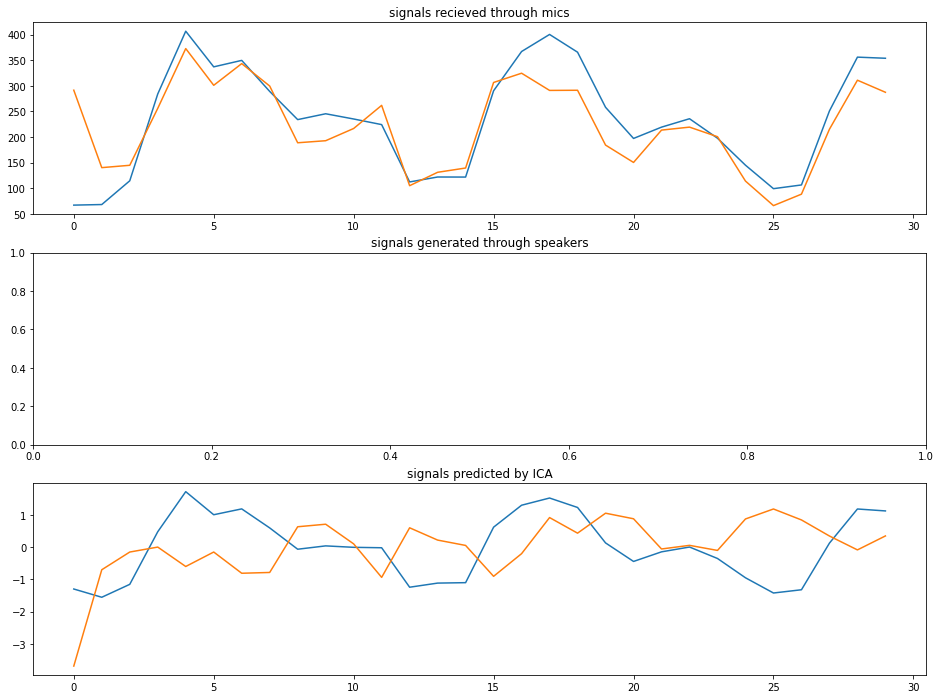

In [37]:
S,W = ica(X,2, iterations=5000)
plot_graph([X[0],X[1]],[],S)

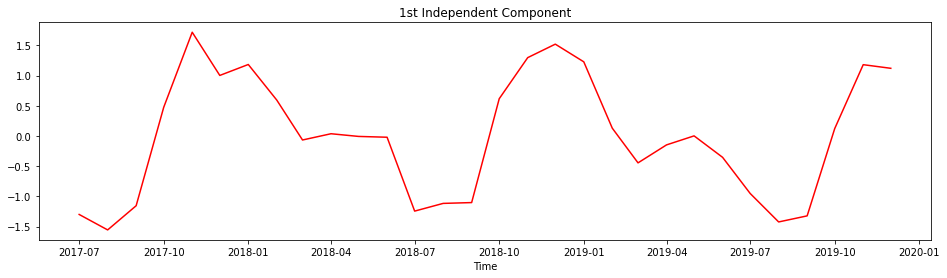

In [59]:
plt.figure(figsize = (16,4))
plt.plot(aqi['Date.1'],S[0],'r')
plt.xlabel('Time')
plt.title('1st Independent Component')
plt.savefig('1st Independent Component.png')

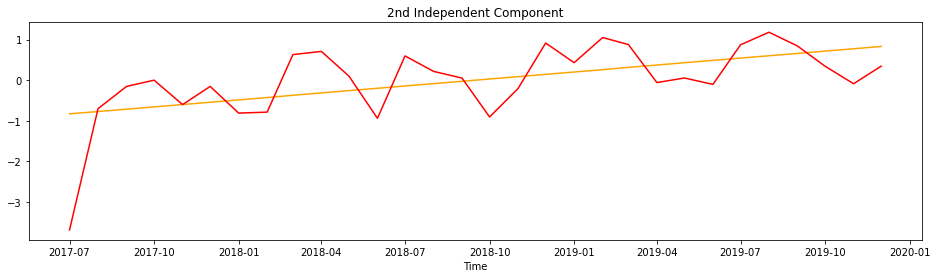

In [58]:
plt.figure(figsize = (16,4))
l = np.arange(30)
#l = aqi['Date.1']
z = np.polyfit(l, S[1], 1)
p = np.poly1d(z)
plt.plot(aqi['Date.1'],p(l),'orange')
plt.plot(aqi['Date.1'],S[1],'r')
plt.xlabel('Time')
plt.title('2nd Independent Component')
plt.savefig('2nd Independent Component.png')
plt.show()

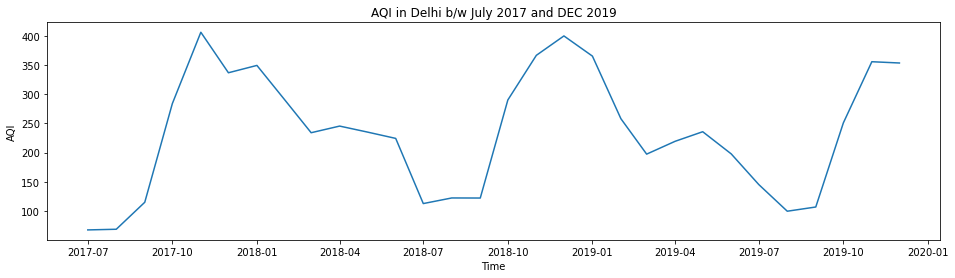

In [61]:
plt.figure(figsize = (16,4))
plt.plot(aqi['Date.1'],X[0])
plt.ylabel('AQI')
plt.xlabel('Time')
plt.title('AQI in Delhi b/w July 2017 and DEC 2019')
plt.savefig('Mixture1.png')

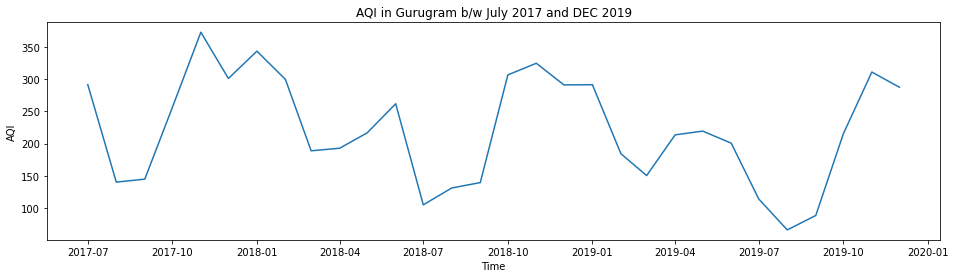

In [63]:
plt.figure(figsize = (16,4))
plt.plot(aqi['Date.1'],X[1])
plt.ylabel('AQI')
plt.xlabel('Time')
plt.title('AQI in Gurugram b/w July 2017 and DEC 2019')
plt.savefig('Mixture2.png')